#**sentiment Analysis**
Implement a solution using naïve Bayes to know the review of movies. Implement solutions using both the tf and tf-idf features.

#**Implementation**


    classification method:-- Naive Bayes
    word count features:-- tf-idf
    classifier:-- Multinomial Naive Bayes classifier


following steps to are being followed in implementation:--

1. get the sample labelled data
2. clean the data
3. use tf-idf
4. train the data
5. test the model accuracy
6. get prediction on new data.

one very important aspect here is that, we keep a proportion of labelled data, to test on the trained model which will give us idea about the accurqcy of "MODEL". usually the partition is 80% - 20%





In [ ]:
import nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
import numpy as np

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import csv

In [ ]:
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')

In [ ]:
movie_reviews.fileids('pos')[0]

'pos/cv000_29590.txt'

In [ ]:
raw_data = []
for i in range(len(fileids_pos)):
     raw_data.append(movie_reviews.raw(fileids_pos[i]))
for i in range(len(fileids_neg)):
     raw_data.append(movie_reviews.raw(fileids_neg[i]))

In [ ]:
# creating 0 for negative review and 1 for positive review, 
# 0 and 1 is equivalent to number of positive and negative reviews.
labels = [0] * len(fileids_pos) + [1] * len(fileids_neg)  

In [ ]:
for item in labels:
  if item == 1:
    print(item)



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.2)

In [ ]:
tfidf = TfidfVectorizer(use_idf=True)
tfidf_data = tfidf.fit_transform(X_train)
print(tfidf_data.shape)

(1600, 36228)


In [ ]:
classifier = MultinomialNB().fit(tfidf_data, Y_train)

In [ ]:
testing_tfidf = tfidf.transform(X_test)
predictions = classifier.predict(testing_tfidf)
print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))

              precision    recall  f1-score   support

         pos       0.78      0.81      0.79       191
         neg       0.82      0.79      0.81       209

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



In [ ]:
t = np.array(["it was a terrible movie"])
t = tfidf.transform(t)
p = classifier.predict(t)
print(p)

[1]


(-1.0, 1.0)

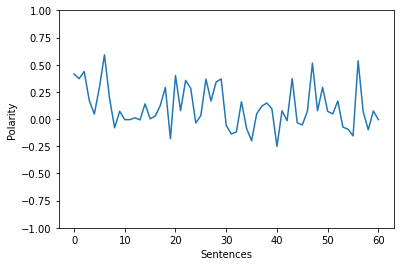

In [ ]:
import matplotlib.pyplot as plt
sentences = X_test[0].split('.')
testing_tfidf = tfidf.transform(sentences)
predictions = classifier.predict_proba(testing_tfidf)
polarity = [x[0] - x[1] for x in predictions]
plt.xlabel('Sentences')
plt.ylabel('Polarity')
plt.plot(polarity)
plt.ylim(-1, 1)

In [ ]:

np.unique(predictions, return_counts=True)
predictions

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

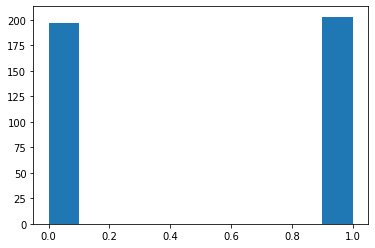

In [ ]:
import matplotlib.pyplot as plt


plt.hist(predictions)
plt.show()

#**Discussion**

* We use the TfidVecorizer from sklearn to form the tf or tf-idf features – the choice
can be made by turning the option “use_idf” on or off. 


* quality of labelled data 


    In sentiment analysis, the quality of labelled data
    matters alot. Like, above we are using already labelled
    data to train our model, imagine our data being not
    very accurate, so obviouslly trained model will not
    be that great.

* prediction

      once our model is ready, we will pass "new text" to the
       model and get the prediction probability.
       internally naive Bayes, is being used to predict the 
       sentiment of new text/tweet/paragraph.

       p = classifier.predict(t)
       print(p)
       O/P -> [1]

       here output 1 meand with higher probability this test,
       belongs to class 1. (1- negative,0- positive)



* metric
          precision    recall  f1-score   support

         pos       0.78      0.81      0.79       191
         neg       0.82      0.79      0.81       209

       accuracy                        0.80       400


       f1- score is the most important here as it balaance
        between  precision and recall.
        * here our model has accuracy of 80% which is good.
  





